In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

CLEAN_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0/"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:0'
########## initulize reference data and target data
from alignment.data_preprocess import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from representationTrans.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 455.38it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 5801.99it/s]


absolute alignment indicates number: 106 label diff indicates number: 12 confidence diff indicates number: 16 high distance number: 97


In [6]:
def get_epoch_plot_measures(epoch):
        """get plot measure for visualization"""
        # data = self.train_representation
        data = ref_provider.train_representation(epoch)
        embedded = projector.batch_project(epoch, data)

        ebd_min = np.min(embedded, axis=0)
        ebd_max = np.max(embedded, axis=0)
        ebd_extent = ebd_max - ebd_min

        x_min, y_min = ebd_min - 0.1 * ebd_extent
        x_max, y_max = ebd_max + 0.1 * ebd_extent

        x_min = min(x_min, y_min)
        y_min = min(x_min, y_min)
        x_max = max(x_max, y_max)
        y_max = max(x_max, y_max)

        return x_min, y_min, x_max, y_max
x_min, y_min, x_max, y_max = get_epoch_plot_measures(200)
resolution = 200
# create grid
xs = np.linspace(x_min, x_max, resolution)
ys = np.linspace(y_min, y_max, resolution)
grid = np.array(np.meshgrid(xs, ys))
grid = np.swapaxes(grid.reshape(grid.shape[0], -1), 0, 1)

In [10]:
# map gridmpoint to images
grid_samples = projector.batch_inverse(200, grid)
#### in ref ' space
np_grid_samples = np.asarray(grid_samples)

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 9759.30it/s]


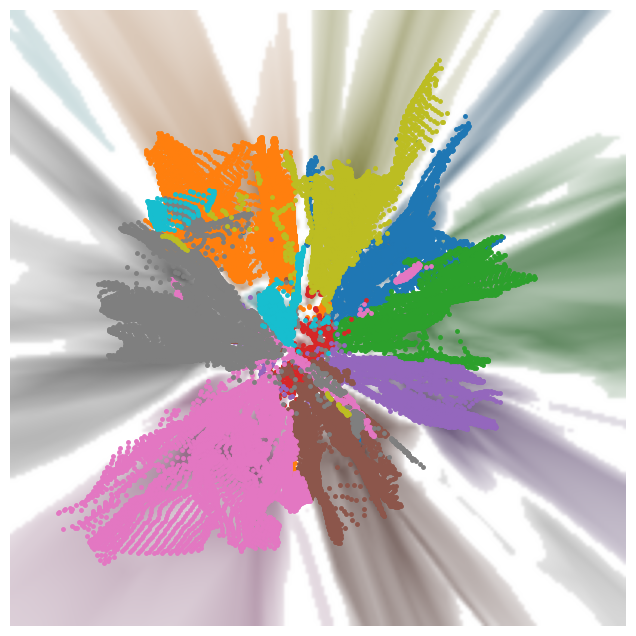

In [23]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)

from AlignVisAutoEncoder.visualizer_grids import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, I,I, np.dot(np_grid_samples,I), projector, 200,[],'tab10')
# from representationTrans.visualizer import visualizer
# vis = visualizer(tar_provider, I,I, np.dot(tar_provider.test_representation(200), I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 6497.06it/s]


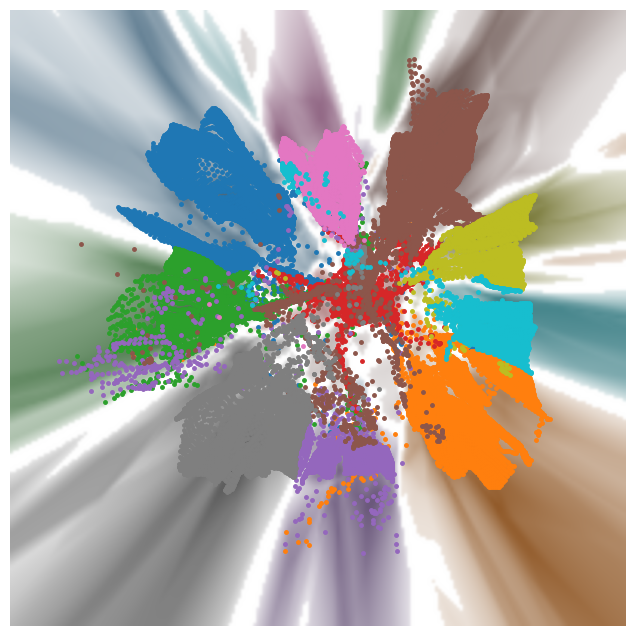

In [32]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'

projector = TimeVisProjector(vis_model=model, content_path=CLEAN_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")


x_min, y_min, x_max, y_max = get_epoch_plot_measures(200)
resolution = 200
# create grid
xs = np.linspace(x_min, x_max, resolution)
ys = np.linspace(y_min, y_max, resolution)
grid = np.array(np.meshgrid(xs, ys))
grid = np.swapaxes(grid.reshape(grid.shape[0], -1), 0, 1)
# map gridmpoint to images
grid_samples = projector.batch_inverse(200, grid)

#### in ref ' space
np_grid_samples = np.asarray(grid_samples)

I = np.eye(512)

from AlignVisAutoEncoder.visualizer_grids import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, I,I, np.dot(np_grid_samples,I), projector, 200,[],'tab10')
# from representationTrans.visualizer import visualizer
# vis = visualizer(tar_provider, I,I, np.dot(tar_provider.test_representation(200), I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 7040.44it/s]


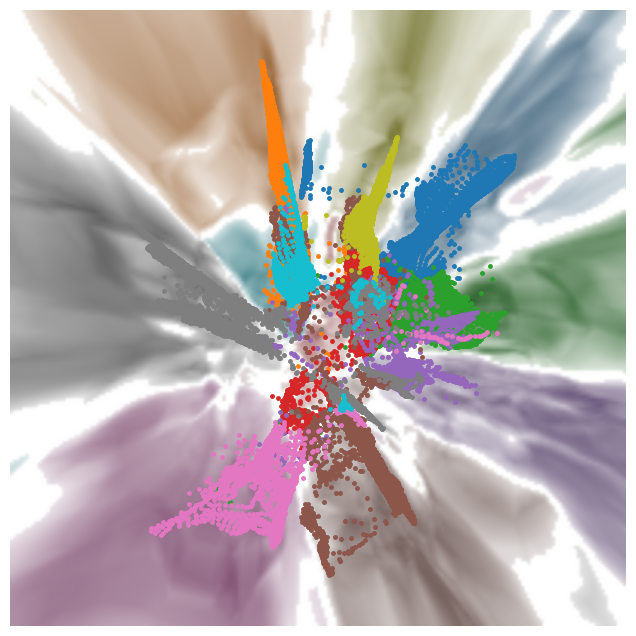

In [56]:
from AlignVisAutoEncoder.visualizergrids import visualizer
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
encoded_Y_grid = autoencoder.encoder(torch.Tensor(np_grid_samples))
vis = visualizer(tar_provider, autoencoder, np.dot(encoded_Y_grid.detach().numpy(),I), projector, 200,[],True,'tab10')
# from representationTrans.visualizer import visualizer
# vis = visualizer(tar_provider, I,I, np.dot(tar_provider.test_representation(200), I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

In [37]:
# Visualize boundary sample 
DEVICE='cuda:1'
####### generate boundary ponits for tar and ref respectively
from AlignVis.AlignmentBoundaryGenerator import AlignmentBoundaryGenerator
BoundaryGen = AlignmentBoundaryGenerator(REF_PATH,CLEAN_PATH,REF_PATH,CLEAN_PATH,REF_EPOCH,TAR_EPOCH,DEVICE)
ref_boundary,tar_boundary = BoundaryGen.get_boundary_point(DEVICE,num_adv_eg=5000)
import torch
###### get border sample features
import torch.nn as nn

ref_feature_model = ref_model.to(DEVICE)
ref_feature_model = nn.Sequential(*list(ref_feature_model.children())[:-1])
with torch.no_grad():
    features = ref_feature_model(ref_boundary)
    ref_features = features.view(ref_boundary.shape[0], -1).cpu().numpy()

###### get border sample features
tar_feature_model = tar_model.to(DEVICE)
tar_feature_model = nn.Sequential(*list(tar_feature_model.children())[:-1])
with torch.no_grad():
    tar_features = tar_feature_model(tar_boundary)
    tar_features = tar_features.view(tar_boundary.shape[0], -1).cpu().numpy()

NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 600.81it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:01<00:00, 131.12it/s]


conf1 (4, 10) (7, 10) (4, 10) (7, 10)
data1_index or data2_index is None
data1_index or data2_index is None
conf1 (4, 10) (7, 10) (4, 10) (7, 10)
conf1 (3, 10) (7, 10) (3, 10) (7, 10)
conf1 (3, 10) (7, 10) (3, 10) (7, 10)
conf1 (6826, 10) (7, 10) (6826, 10) (7, 10)
data1_index or data2_index is None
conf1 (15, 10) (7, 10) (15, 10) (7, 10)
data1_index or data2_index is None
data1_index or data2_index is None
conf1 (15, 10) (7, 10) (15, 10) (7, 10)
conf1 (15, 10) (4, 10) (15, 10) (4, 10)
data1_index or data2_index is None
conf1 (3, 10) (6826, 10) (3, 10) (6826, 10)
data1_index or data2_index is None
conf1 (15, 10) (3, 10) (15, 10) (3, 10)
conf1 (15, 10) (3, 10) (15, 10) (3, 10)
data1_index or data2_index is None
data1_index or data2_index is None
data1_index or data2_index is None
data1_index or data2_index is None
data1_index or data2_index is None
data1_index or data2_index is None
conf1 (4, 10) (7, 10) (4, 10) (7, 10)
data1_index or data2_index is None
conf1 (15, 10) (4, 10) (15, 10) 

Computing decision regions ...


100%|██████████| 25/25 [00:00<00:00, 13769.88it/s]


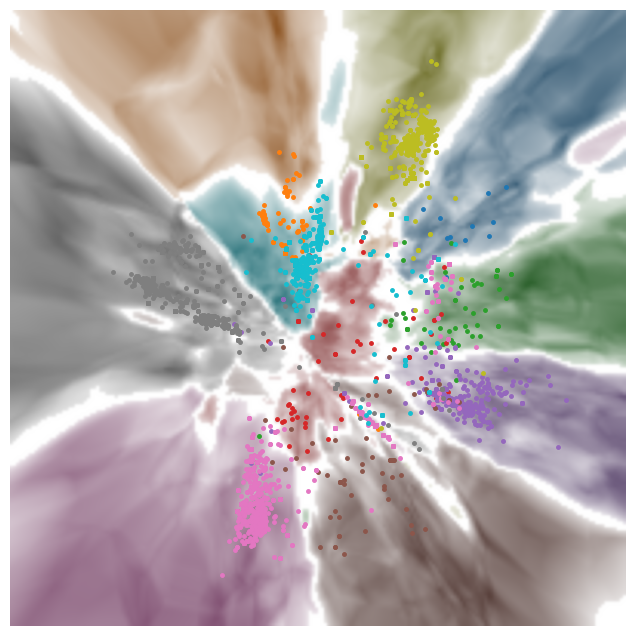

In [38]:
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

vis = visualizer(ref_provider, I,I, np.dot(ref_features,I), projector, 200,[],'tab10')
# from representationTrans.visualizer import visualizer
# vis = visualizer(tar_provider, I,I, np.dot(tar_provider.test_representation(200), I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 25/25 [00:00<00:00, 11401.28it/s]


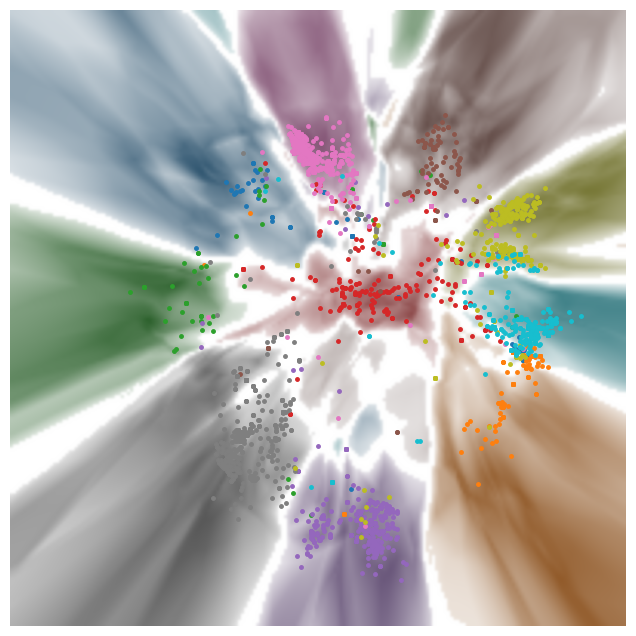

In [61]:

projector = TimeVisProjector(vis_model=model, content_path=CLEAN_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
from AlignVisAutoEncoder.visualizer_forgrids import visualizer
# from representationTrans.visualizer import visualizer


vis = visualizer(tar_provider, autoencoder, np.dot(tar_features,I), projector, 200,[],False,'tab10')
# from representationTrans.visualizer import visualizer
# vis = visualizer(tar_provider, I,I, np.dot(tar_provider.test_representation(200), I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 25/25 [00:00<00:00, 12202.68it/s]


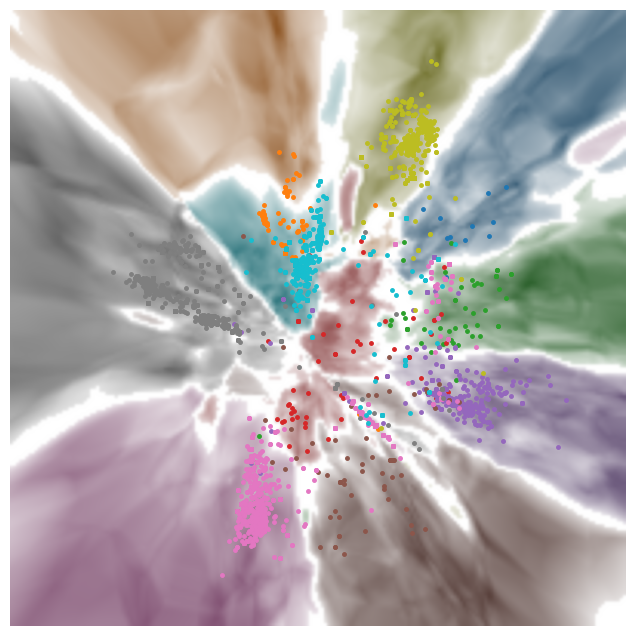

In [59]:

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
from AlignVisAutoEncoder.visualizer_forgrids import visualizer
# from representationTrans.visualizer import visualizer


vis = visualizer(ref_provider, autoencoder, np.dot(ref_features,I), projector, 200,[],False,'tab10')
# from representationTrans.visualizer import visualizer
# vis = visualizer(tar_provider, I,I, np.dot(tar_provider.test_representation(200), I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 25/25 [00:00<00:00, 11493.76it/s]


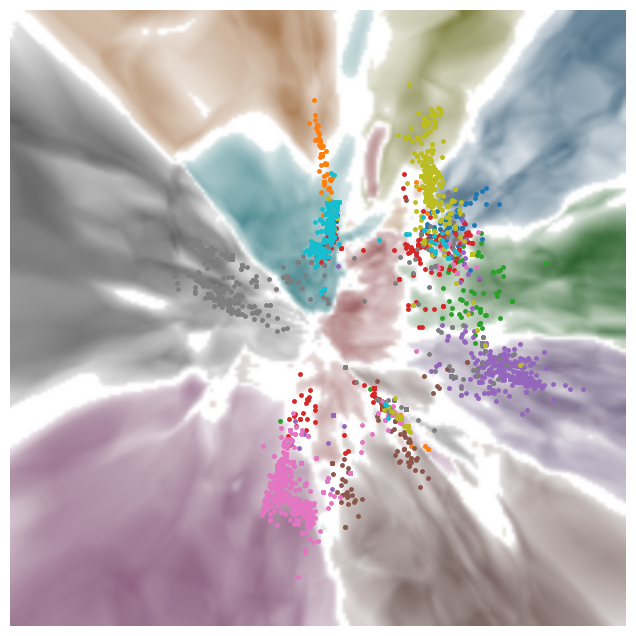

In [63]:
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
from AlignVisAutoEncoder.visualizergrids import visualizer
# from representationTrans.visualizer import visualizer

encoded_Y_grid = autoencoder.encoder(torch.Tensor(tar_features))
vis = visualizer(tar_provider, autoencoder, np.dot(encoded_Y_grid.detach().numpy(),I), projector, 200,[],True,'tab10')
# from representationTrans.visualizer import visualizer
# vis = visualizer(tar_provider, I,I, np.dot(tar_provider.test_representation(200), I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

In [69]:
epoch = 200
from singleVis.eval.evaluate import *
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
train_data = encoded_Y_grid.detach().numpy()
embedding = projector.batch_project(epoch, train_data)
inv_data = projector.batch_inverse(epoch, embedding)
pred = tar_provider.get_pred(epoch, tar_features).argmax(axis=1)
new_pred = tar_provider.get_pred(epoch, inv_data).argmax(axis=1)
val = evaluate_inv_accu(pred, new_pred)

print("#train# PPR: {:.2f} in epoch {:d}".format(val, epoch))

100%|██████████| 25/25 [00:00<00:00, 12804.69it/s]

#train# PPR: 0.33 in epoch 200


In [28]:
from AlignVisAutoEncoder.autoencoder import SimpleAutoencoder
from AlignVisAutoEncoder.data import DataLoaderInit
input_dim = 512
output_dim = 512

autoencoder = SimpleAutoencoder(input_dim,output_dim)
checkpoint = torch.load("/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVisAutoEncoder/checkpoints/123.pth")
autoencoder.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 5608.89it/s]


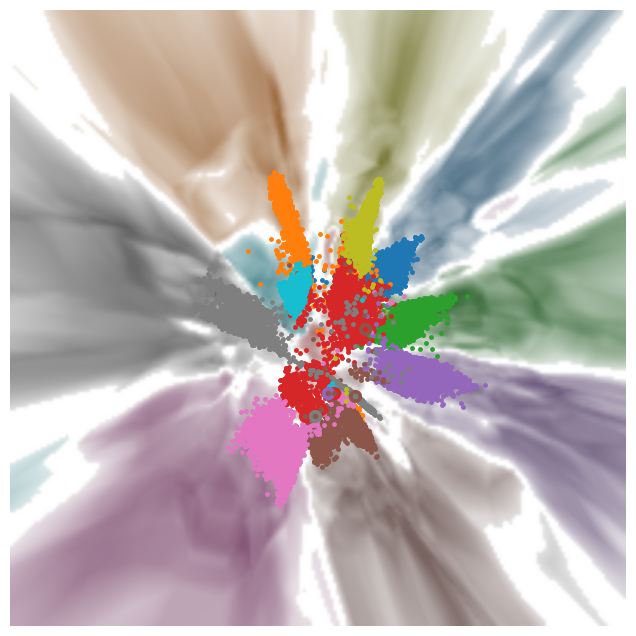

In [31]:
X = torch.Tensor(ref_provider.train_representation(REF_EPOCH))
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
# Transform X into Y's space
encoded_X = autoencoder.decoder(X)

# Transform Y into X's space
encoded_Y = autoencoder.encoder(Y)

import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVisAutoEncoder.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))